In [ ]:
#Import nessessary libraries
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# **1) Fundamentals**

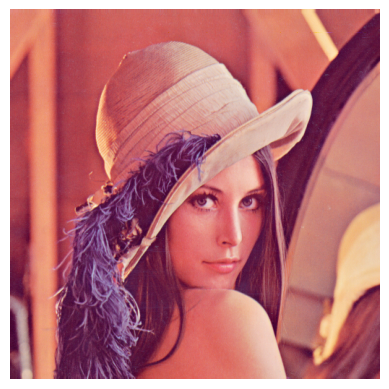

In [ ]:
# Open the image file and display with plot
file_path = '/content/Lena.png'  # Replace with the path to your image file
image = cv.imread(file_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
if image is not None:
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
else:
    print("Error: Unable to open the image file.")

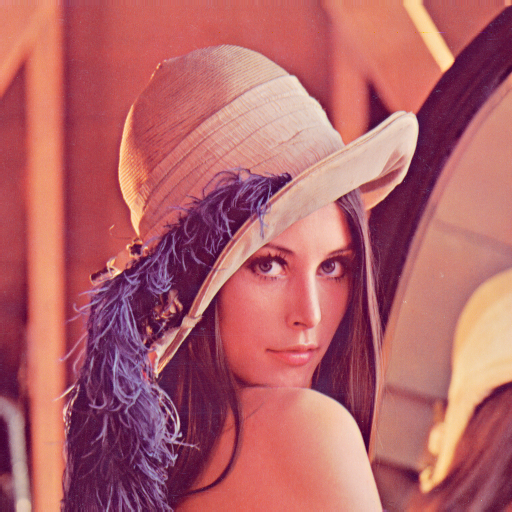

In [ ]:
# Open the image file and display with colab
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
if image is not None:
    # Display the image using cv2_imshow
    cv2_imshow(image)
else:
    print("Error: Unable to open the image file.")


In [ ]:
# Detail the resolution and color depth of the image
print("Type:", type(image))
print("Size:", image.shape)

Type: <class 'numpy.ndarray'>
Size: (512, 512, 3)


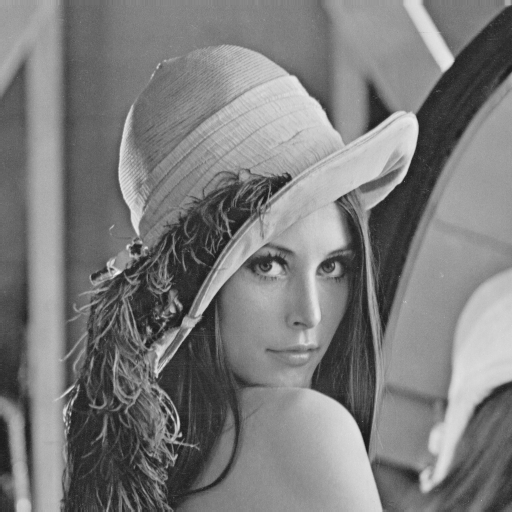

In [ ]:
# Convert RGB to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

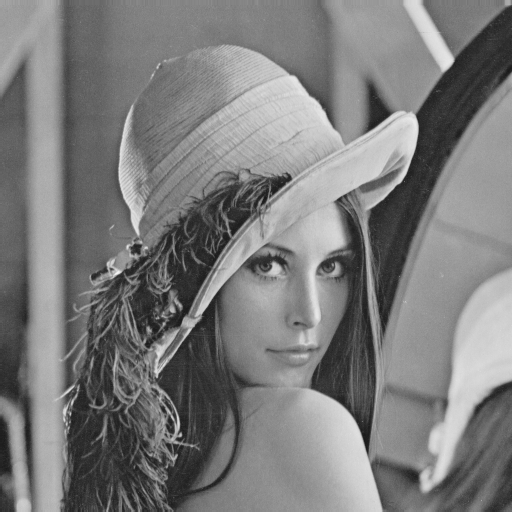

In [ ]:
# Get the dimensions of the image
height, width, channels = image.shape
# Iterate over each pixel in the image
mygray = np.zeros((height, width, channels), dtype=np.uint8)
for y in range(height):
    for x in range(width):
        # Get the current pixel value (BGR)
        b, g, r = image[y, x]

        # Modify the pixel values (for example, make it grayscale)
        gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
        mygray[y, x] = [gray_value, gray_value, gray_value]

# Save or display the modified image
cv.imwrite('Lena_gray.jpg', mygray)  # Save the modified image
cv2_imshow(mygray)      # Display the modified image
cv.waitKey(0)
cv.destroyAllWindows()


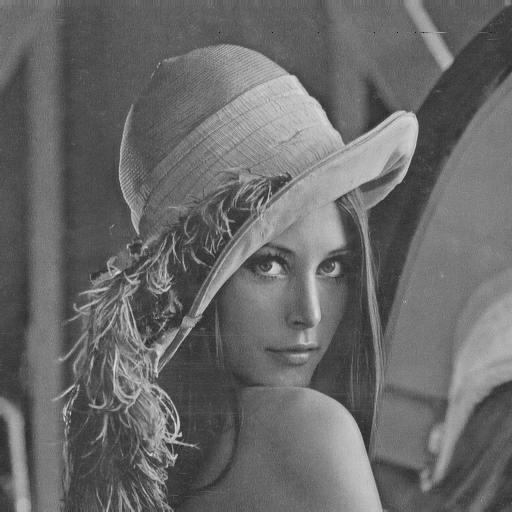

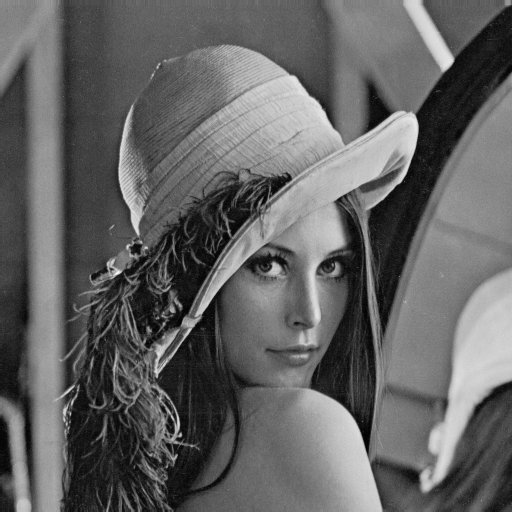

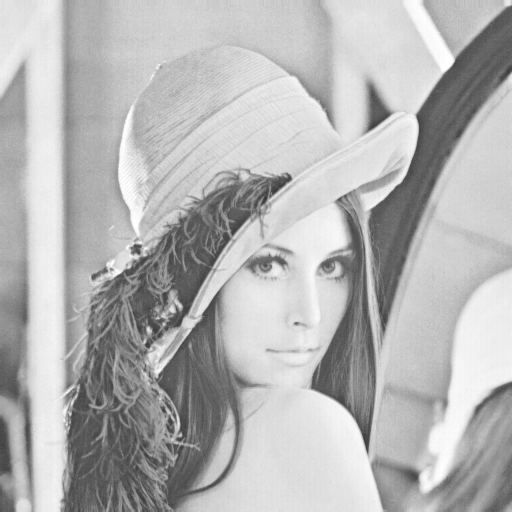

In [ ]:
# Split the image into its color channels
blue_channel, green_channel, red_channel = cv.split(image)

# Display or save the individual channels
cv2_imshow( blue_channel)
cv2_imshow( green_channel)
cv2_imshow( red_channel)


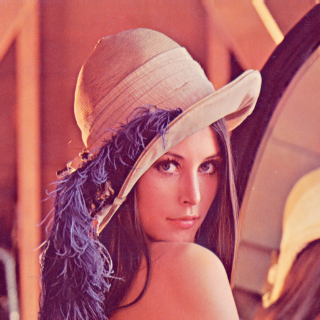

In [ ]:
# Resize the image to the new resolution
new_width = 320
new_height = 320
resized_image = cv.resize(image, (new_width, new_height))
cv2_imshow(resized_image)

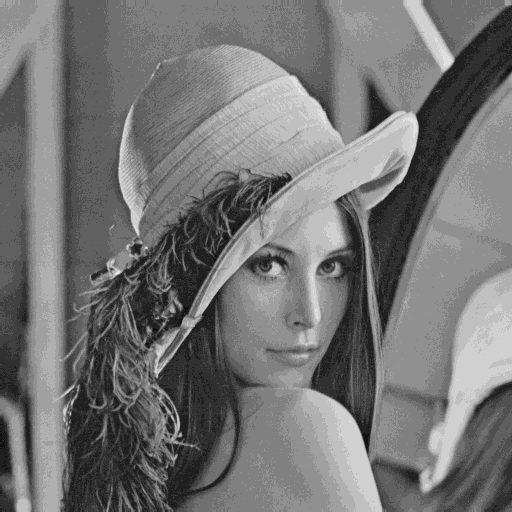

In [ ]:
# Convert to 4-bit depth (16 colors)
image_4bit = cv.cvtColor(image, cv.COLOR_BGR2GRAY) // 16 * 16

# Display or save the 4-bit image
cv2_imshow(image_4bit)

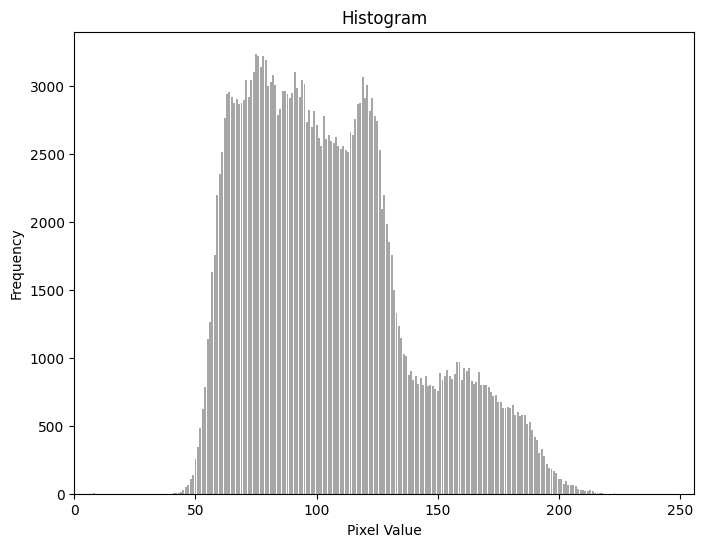

In [ ]:
hist = cv.calcHist([image], [0], None, [256], [0, 256])
x = np.arange(256)
# Convert the histogram values to a NumPy array for plotting
hist = np.squeeze(hist)
plt.figure(figsize=(8, 6))
plt.bar(x, hist, color='gray', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.show()

In [ ]:
# Calculate the maximum and minimum pixel values and their locations
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(gray)
print(min_val, max_val)

25.0 245.0


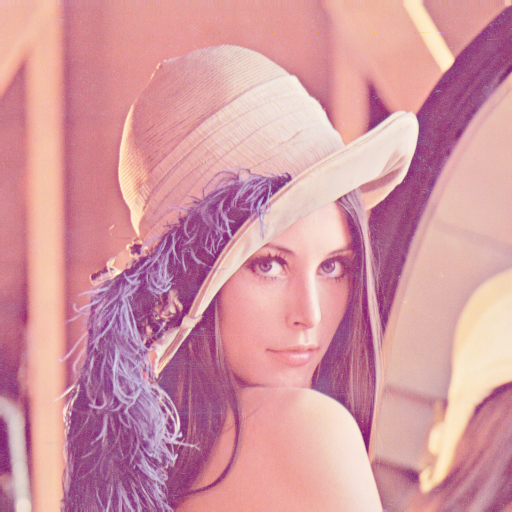

In [ ]:
#Gamma correction
# Define the gamma value (adjust as needed)
gamma = 0.5
# Apply gamma correction
corrected_image = np.power(image / 255.0, gamma) * 255.0
corrected_image = corrected_image.astype(np.uint8)
cv2_imshow(corrected_image)

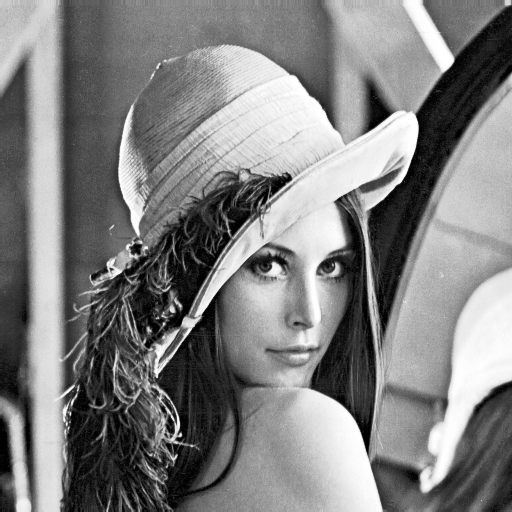

In [ ]:
# Apply histogram equalization
equalized_image = cv.equalizeHist(gray)
cv2_imshow( equalized_image)


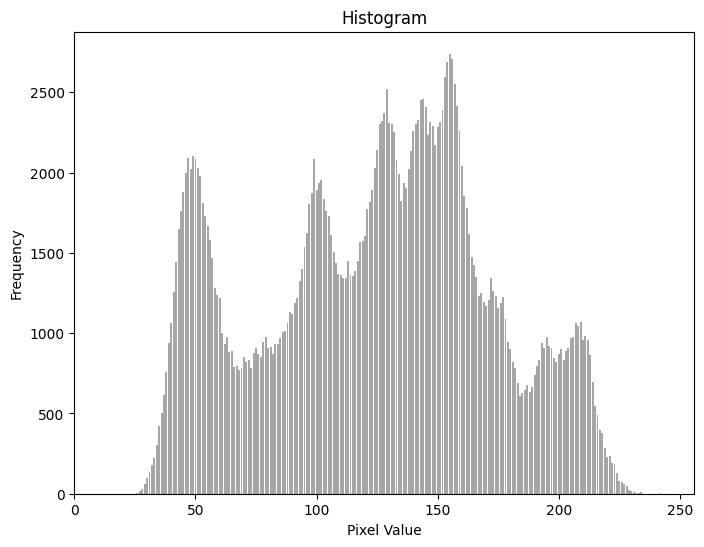

In [ ]:
hist = cv.calcHist([gray], [0], None, [256], [0, 256])
x = np.arange(256)
# Convert the histogram values to a NumPy array for plotting
hist = np.squeeze(hist)
plt.figure(figsize=(8, 6))
plt.bar(x, hist, color='gray', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.show()

# **2) Spatial Filtering**

In [ ]:
def convolution(image, kernel):
    """
    Compute the convolution of an image with a kernel.

    Args:
        image (numpy.ndarray): The input image as a 2D or 3D NumPy array.
        kernel (numpy.ndarray): The convolution kernel as a 2D NumPy array.

    Returns:
        numpy.ndarray: The convolved image.
    """
    if len(image.shape) == 2:
        # Grayscale image
        image_height, image_width = image.shape
        kernel_height, kernel_width = kernel.shape

        # Calculate the output image size
        output_height = image_height - kernel_height + 1
        output_width = image_width - kernel_width + 1

        # Create an empty output image
        output = np.zeros((output_height, output_width))

        # Perform convolution
        for i in range(output_height):
            for j in range(output_width):
                output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)

        return output
    elif len(image.shape) == 3:
        # Color image (3 channels)
        # Apply convolution to each channel separately
        channel_r = convolution(image[:, :, 0], kernel)
        channel_g = convolution(image[:, :, 1], kernel)
        channel_b = convolution(image[:, :, 2], kernel)

        # Stack the channels to form the RGB image
        output = np.stack((channel_r, channel_g, channel_b), axis=-1)

        return output
    else:
        raise ValueError("Input image must be either 2D (grayscale) or 3D (color RGB).")


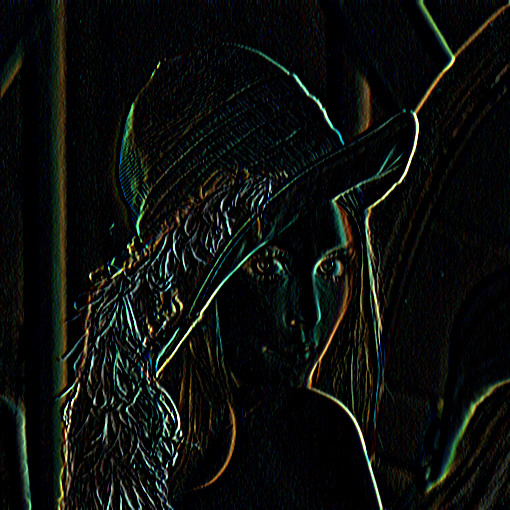

In [ ]:
kernel = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])
filtered_image = convolution(image, kernel)
cv2_imshow(filtered_image)


In [ ]:
 # Create a sample grayscale image
img = np.array([[2, 3, 4, 5],
                      [1, 2, 3, 4],
                      [0, 1, 2, 3],
                      [1, 2, 3, 4]])
res = convolution(img, kernel)
print(res)

[[-6. -6.]
 [-6. -6.]]


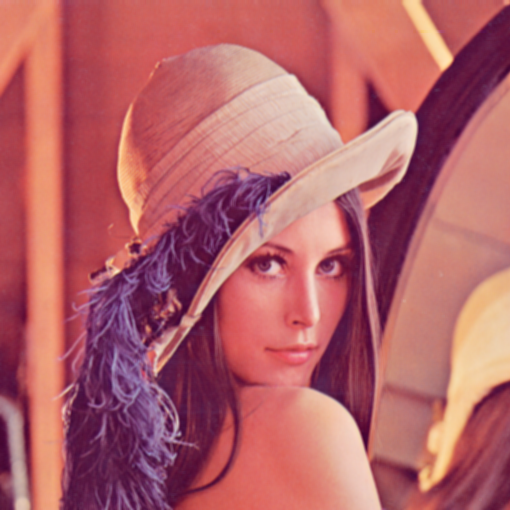

In [ ]:
# average filter
average_kernel = 1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
smoothed_img = convolution(image, average_kernel)
cv2_imshow(smoothed_img)

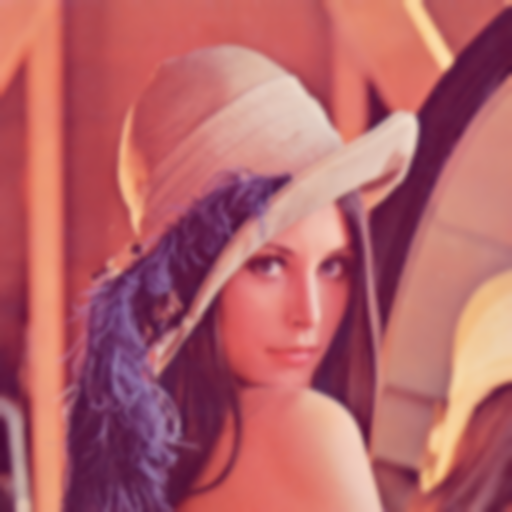

In [ ]:
ksize = (15, 15)
# Apply Gaussian blur to the image
#blurred_image = cv.GaussianBlur(image, ksize, 0)
blurred_image = cv.GaussianBlur(image, ksize, 0)
cv2_imshow(blurred_image)

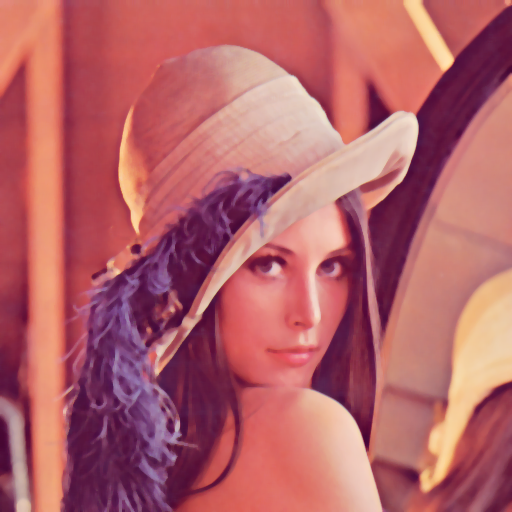

In [ ]:
# median filter
ksize = 5
blurred_image = cv.medianBlur(image, ksize)
cv2_imshow(blurred_image)

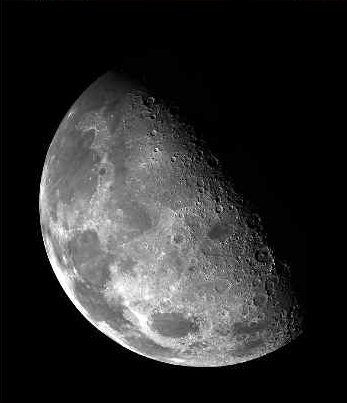

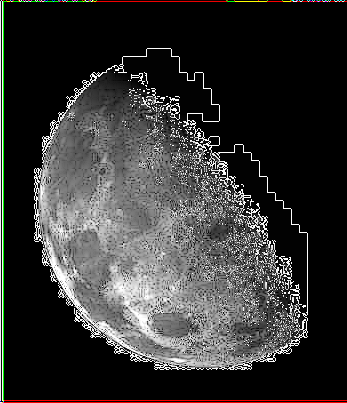

In [ ]:
# Sharpening
sharpen_path = '/content/Sharpen.png'
c = -1
image = cv.imread(sharpen_path)
cv2_imshow(image)
kernel1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
inter1 = cv.filter2D(src=image, ddepth=-1, kernel=kernel1)
sharped_image = image + inter1
sharped_image = image - inter1

# Kiểm tra giá trị tối đa và tối thiểu của ảnh
min_value = sharped_image.min()
max_value = sharped_image.max()

# Chuyển đổi giá trị màu từ 0-1 sang 0-255
img_0_to_255 = ((sharped_image - min_value) / (max_value - min_value) * 255).astype('uint8')

cv2_imshow(img_0_to_255)


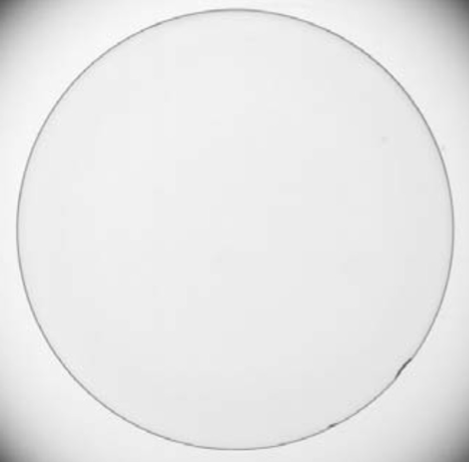

<ipython-input-25-153818ed6e8e>:11: RuntimeWarning: invalid value encountered in divide
  img_0_to_255 = ((gradient2 - min_value) / (max_value - min_value) * 255).astype('uint8')


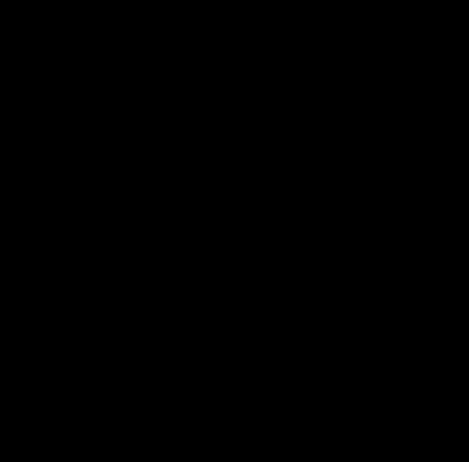

In [ ]:
# Sharpening
circle_path = '/content/Circle.png'
image = cv.imread(circle_path)
cv2_imshow(image)
kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
gradient2 = cv.filter2D(src=image, ddepth=-1, kernel=kernel1)
# Kiểm tra giá trị tối đa và tối thiểu của ảnh
min_value = gradient2.min()
max_value = gradient2.max()
# Chuyển đổi giá trị màu từ 0-1 sang 0-255
img_0_to_255 = ((gradient2 - min_value) / (max_value - min_value) * 255).astype('uint8')
cv2_imshow(img_0_to_255)

# **3) Frequency Filtering**
https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

3.1 Fourier transform with numpy

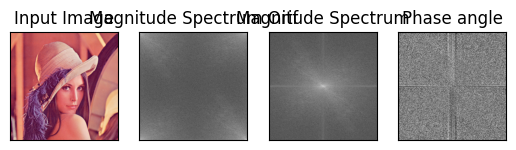

In [ ]:
file_path = '/content/Lena.png'
image = cv.imread(file_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))
imagery = np.angle(fshift)
plt.subplot(141),plt.imshow(image)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(magnitude_spectrum_ori, cmap = 'gray')
plt.title('Magnitude Spectrum Orif'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(imagery, cmap = 'gray')
plt.title('Phase angle'), plt.xticks([]), plt.yticks([])
plt.show()

3.2) Fourier transform with openCV

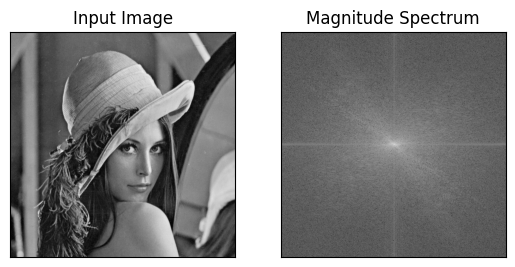

In [ ]:
dft = cv.dft(np.float32(gray),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

3.3 Re-create spatial image from spectrum and phase angle

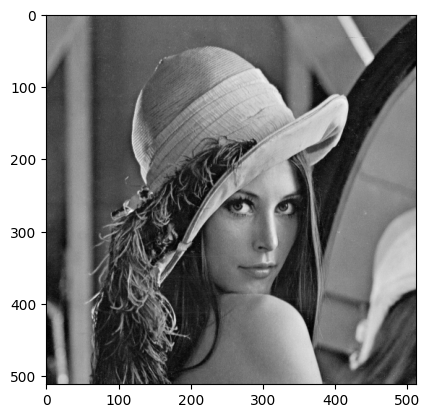

In [ ]:
combined = np.multiply(np.abs(f), np.exp(1j*np.angle(f)))
imgCombined = np.real(np.fft.ifft2(combined))
plt.imshow(imgCombined, cmap='gray')

3.4) Ideal high-pass filters

(Text(0.5, 1.0, 'Image after HPF'), ([], []), ([], []))

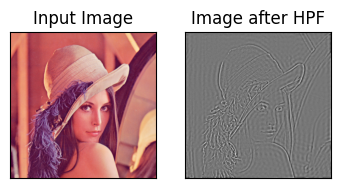

In [ ]:
rows, cols = gray.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(imagery, cmap = 'gray')
# plt.show()

3.5) Demonstrate that Gaussian, Median filters are low-pass filters, and Laplacian is high-pass filter.

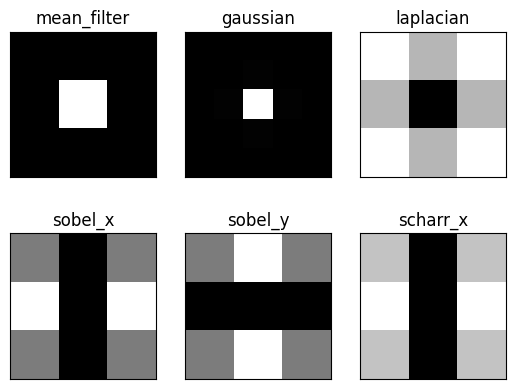

In [ ]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))
# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

3.6 Ideal low-pass filters
1) create a small white circle on a black background
2) Multiply the circle with the fshift (computed in 3.1)
3) reconvert from frequency domain to spatial domain

<ipython-input-46-385c11a6b217>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(image, cmap = 'gray')


(Text(0.5, 1.0, 'Image after LPF'), ([], []), ([], []))

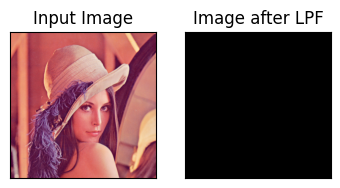

In [ ]:
rows, cols = gray.shape
circleImg = np.zeros((rows, cols, 3), dtype = np.uint8)
center_coordinates = (rows//2, cols//2)
radius = 30
color = (255, 255, 255)
thickness = -1
cv.circle(circleImg, center_coordinates, radius, color, thickness)
plt.imshow(circleImg, cmap='gray')
circleImg_gray = cv.cvtColor(circleImg, cv.COLOR_BGR2GRAY)
fshift = fshift * circleImg_gray

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
